In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
col_names = ["age", "workclass", "fnlwgt", "education", "edu_num", "martial_status", "occupation", "relationship", "race", "gender", 
            "cap_gain", "cap_loss", "hrs_per_week", "country", "salary"]
df = pd.read_csv("adult.csv", names = col_names)
df.head()

,age,workclass,fnlwgt,education,edu_num,martial_status,occupation,relationship,race,gender,cap_gain,cap_loss,hrs_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [274]:
drop_cols = ["fnlwgt", "martial_status", "relationship", "race", "cap_gain", "cap_loss"]
df = df.drop(drop_cols, axis= 1)

In [275]:
df.head()

,age,workclass,education,edu_num,occupation,gender,hrs_per_week,country,salary
0,39,State-gov,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Female,40,Cuba,<=50K


In [276]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
numerical = [i for i in df.columns if df[i].dtype != 'O']

In [277]:
for i in categorical:
    
    print(i+":")
    print(df[i].value_counts())

workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
occupation:
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       99

In [278]:
df["workclass"].replace(" ?", df["workclass"].mode()[0], inplace = True)
df["occupation"].replace(" ?", df["occupation"].mode()[0], inplace = True)
df["country"].replace(" ?", df["country"].mode()[0], inplace = True)

In [279]:
df.isnull().sum()

age             0
workclass       0
education       0
edu_num         0
occupation      0
gender          0
hrs_per_week    0
country         0
salary          0
dtype: int64

In [280]:
for i in categorical:
    
    print(i+":")
    print(df[i].value_counts())

workclass:
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
occupation:
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       64

In [281]:
df["gender"] = df["gender"].map({" Male": 0, " Female": 1})
df["salary"] = df["salary"].map({" <=50K": 0, " >50K": 1})

In [282]:
df.head()

,age,workclass,education,edu_num,occupation,gender,hrs_per_week,country,salary
0,39,State-gov,Bachelors,13,Adm-clerical,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,13,United-States,0
2,38,Private,HS-grad,9,Handlers-cleaners,0,40,United-States,0
3,53,Private,11th,7,Handlers-cleaners,0,40,United-States,0
4,28,Private,Bachelors,13,Prof-specialty,1,40,Cuba,0


In [283]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
categorical

['workclass', 'education', 'occupation', 'country']

In [284]:
data = [df]
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Not_US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [285]:
df.head()

,age,workclass,education,edu_num,occupation,gender,hrs_per_week,country,salary
0,39,State-gov,Bachelors,13,Adm-clerical,0,40,US,0
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,13,US,0
2,38,Private,HS-grad,9,Handlers-cleaners,0,40,US,0
3,53,Private,11th,7,Handlers-cleaners,0,40,US,0
4,28,Private,Bachelors,13,Prof-specialty,1,40,Not_US,0


In [286]:
df['education'] = df['education'].replace([' 11th',' 10th',' 7th-8th',' 9th',' 12th', ' 5th-6th', " 1st-4th"],'Matric')

In [287]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
categorical

['workclass', 'education', 'occupation', 'country']

In [288]:
# df = pd.concat([df, pd.get_dummies(df.workclass, drop_first = True),
# pd.get_dummies(df.education, drop_first = True),
# pd.get_dummies(df.occupation, drop_first = True),
# pd.get_dummies(df.country, drop_first = True)], axis= 1)

df2= pd.get_dummies(data = df, columns = categorical, drop_first = True)

In [289]:
df2.columns

Index(['age', 'edu_num', 'gender', 'hrs_per_week', 'salary',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'education_Matric',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'country_US'],
      dtype='object')

In [290]:
df2.head()

,age,edu_num,gender,hrs_per_week,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,country_US
0,39,13,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,9,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [291]:
numerical

['age', 'edu_num', 'hrs_per_week']

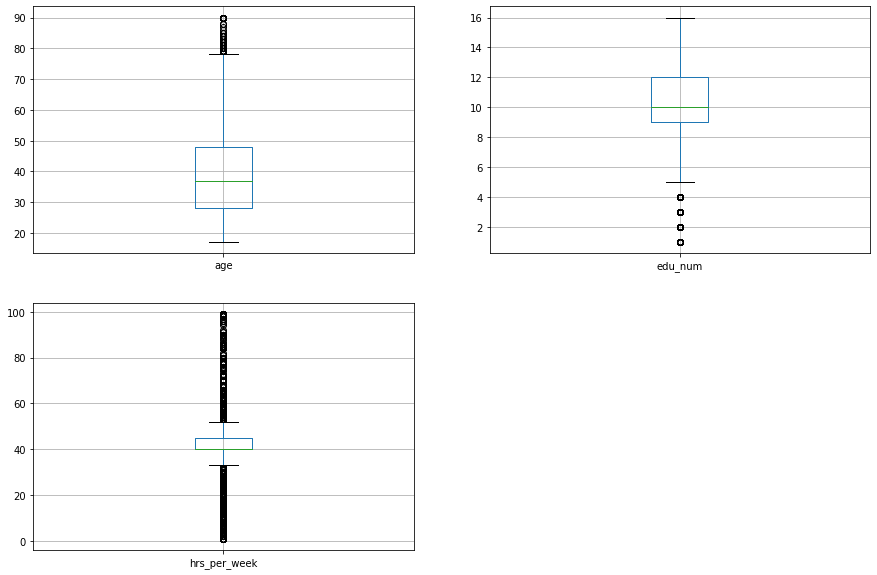

In [296]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df2.boxplot(column = ['age'])
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df2.boxplot(['edu_num'])
# fig.set_title("Glucose")


plt.subplot(2,2,3)
fig = df2.boxplot(['hrs_per_week'])
# fig.set_title("BloodPressure")

Text(0.5, 1.0, 'hrs_per_week')

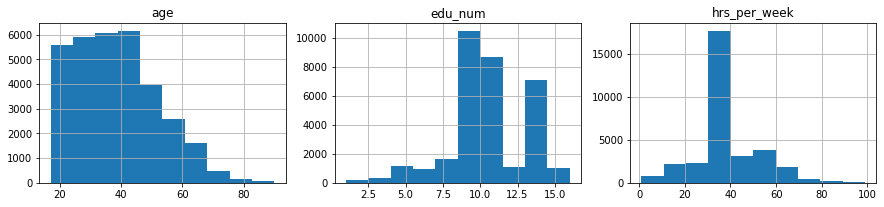

In [297]:
plt.figure(figsize = (15, 10))

plt.subplot(3,3,1)
fig = df2['age'].hist(bins = 10)
fig.set_title("age")

plt.subplot(3,3,2)
fig = df2['edu_num'].hist(bins = 10)
fig.set_title("edu_num")


plt.subplot(3,3,3)
fig = df2['hrs_per_week'].hist(bins = 10)
fig.set_title("hrs_per_week")


In [298]:
for i in numerical:
    iqr = df2[i].quantile(0.75) - df[i].quantile(0.25)
    low = df2[i].quantile(0.25) - (iqr * 1.5)
    high = df2[i].quantile(0.75) + (iqr * 1.5)
    df2[i] = np.where(df2[i] > high, high, df[i])
    df2[i] = np.where(df2[i] < low, low, df[i])

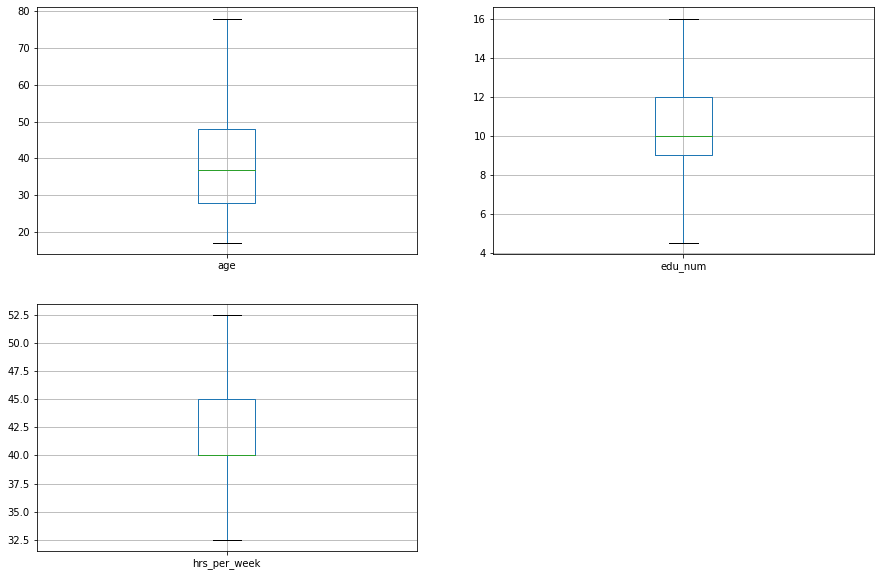

In [299]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column = ['age'])
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df.boxplot(['edu_num'])
# fig.set_title("Glucose")


plt.subplot(2,2,3)
fig = df.boxplot(['hrs_per_week'])
# fig.set_title("BloodPressure")

In [300]:
df2.head()

Index(['age', 'edu_num', 'gender', 'hrs_per_week', 'salary',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'education_Matric',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'country_US'],
      dtype='object')

In [304]:
x = df2.drop("salary", axis=1)
y = df2["salary"]

In [305]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [306]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [308]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [309]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [311]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],xtrain,ytrain,cv=kfold,scoring='accuracy')
    score=models[i].fit(xtrain,ytrain)
    prediction = models[i].predict(xtest)
    acc_score = accuracy_score(ytest,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


----------------------------------------
LR: 0.8195553371821643
----------------------------------------
Random Forest: 0.7938828153789461


C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

----------------------------------------
Neural Network: 0.8183269868566515
----------------------------------------
GaussianNB: 0.3150718584940425
----------------------------------------
DecisionTreeClassifier: 0.7702984891290996
----------------------------------------
SVM: 0.8227490480284977
